# Séance 10 - Exercices

- Avant de réaliser les exercices suivants, assurez-vous d'avoir bien assimilé la matière présentée en cours.
- Il est possible que votre solution soit différente de celle d'un(e) collègue ou de l'enseignant(e).
- __Attention__ : Avant de vous lancer dans l'écriture du code, prenez quelques minutes pour réfléchir à la façon dont vous attaqueriez le problème, ce qui veut dire entre autres que vous devez choisir le bon type de données à utiliser en fonction de ce que vous devez faire (et non pas le premier type qui vous vient à l'esprit).


## Exercice 1
Pour cet exercice, on veut afficher un graphique présentant la variation du taux de change du dollar (É.-U.), de l'euro et du livre sterling. Pour tracer ce graphique, on devra d'abord accéder aux données appropriées auprès de __[Statistique Canada](https://www150.statcan.gc.ca/n1/fr/tbl/csv/33100036-fra.zip?st=hOLNUSmg)__. Notez que ces données sont compressées. Il sera donc nécessaire de décompresser le fichier et d'extraire le fichier en format CSV pour pouvoir ensuite utiliser les données. Ainsi, une fois le fichier téléchargé (avec la librairie `request`), on pourra en extraire le contenu avec les commandes suivantes (on suppose ici que `r` est le résultat de la requête Web) :
```
with zipfile.ZipFile(io.BytesIO(r.content), 'r') as z:
    fichier = z.open(z.namelist()[0])
```

La variable `z.namelist()[0]` fait ici référence au premier fichier contenu dans le fichier ZIP.

Une fois le fichier ouvert, il est possible de le charger en mémoire avec la librairie `pandas` comme suit :
```
table = pd.read_csv(fichier, sep=';')
```

Les colonnes qui nous intéressent sont :

- `'Dollar (États-Unis), moyenne quotidienne'`,
- `'Euro (Europe), moyenne quotidienne'`,
- `'Livre sterling (Royaume-Uni), moyenne quotidienne'`.

De plus, on voudra convertir la colonne `'PÉRIODE DE RÉFÉRENCE'` dans le type `datetime` avec la fonction `to_datetime()` de pandas.

In [2]:
# librairies pour le traitement et l'extraction du fichier CSV de l'archive ZIP
import io
import zipfile

# librairie pour l'appel HTTP
import requests

# librairies pour la visualisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

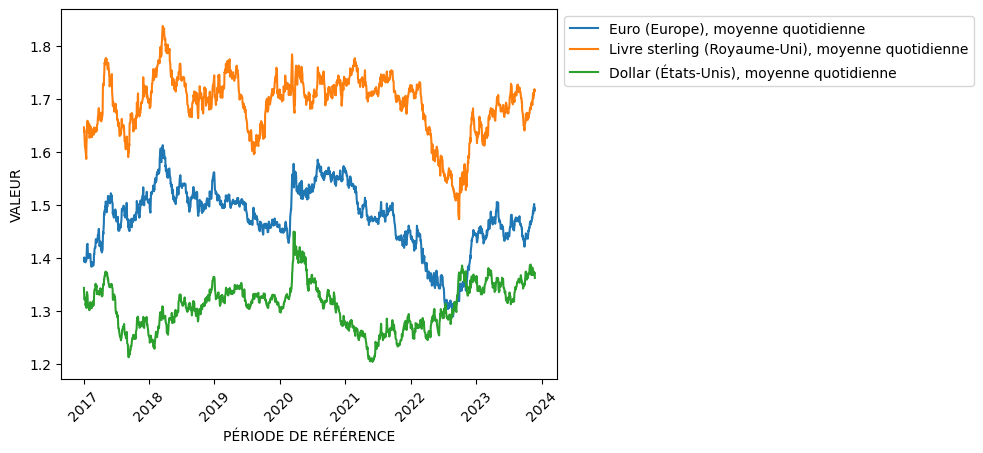

In [7]:
# cellule pour exercice 1...

# Définition de liste avec les noms des devises qui nous intéressent
currencies = ['Dollar (États-Unis), moyenne quotidienne',
                'Euro (Europe), moyenne quotidienne',
                'Livre sterling (Royaume-Uni), moyenne quotidienne']

# Télécharger le fichier ZIP depuis Statistique Canada
url = "https://www150.statcan.gc.ca/n1/fr/tbl/csv/33100036-fra.zip?st=hOLNUSmg"
r = requests.get(url)

# Nous essayons d'établir la connexion ...
try:
    r = requests.get(url)
    r.raise_for_status()


# S'il y a une erreur, imprimez-la
except requests.exceptions.RequestException as e:
    print("Erreur de connexion à l'adresse `{0}` : {1}".format(url, e))

# Si la connexion s'est bien passée et que nous avons pu récupérer le fichier 
else:
    # Décompression du fichier zip
    with zipfile.ZipFile(io.BytesIO(r.content), 'r') as z:
        
        # Extraction du fichier CSV désiré qui est le premier fichier de l'archive
        fichier = z.open(z.namelist()[0])

        # Construction de la structure DataFrame
        table = pd.read_csv(fichier, sep=';')

        # Conversion du champs de date en format datetime
        table['PÉRIODE DE RÉFÉRENCE'] = pd.to_datetime(table['PÉRIODE DE RÉFÉRENCE'])        
        
        # Filtrage des données, par enregistrement
        # 1re condition de restriction : monnaie dans la liste des devises désirée
        # loc[table['Genre de monnaie'].isin(currencies)]
        # 2e condition de restriction : il y a une valeur positive        
        # loc[table['VALEUR'] > 0
        table = table.loc[table['Genre de monnaie'].isin(currencies)].loc[table['VALEUR'] > 0]

        # Préparation du graphe
        graph = sns.lineplot(x="PÉRIODE DE RÉFÉRENCE", y="VALEUR", hue="Genre de monnaie", data=table)
        
        # Ajustement des étiquettes de l'axe des x
        for item in graph.get_xticklabels():
            item.set_rotation(45)
        
        # Déplacement de la légende
        plt.legend(bbox_to_anchor=(1, 1), loc=2)

## Exercice 2
Accédez aux données sur les sites de loisir de la Ville de Laval en format `JSON` à l'adresse suivante :
__[https://www.donneesquebec.ca/recherche/fr/dataset/21b6c3d1-ea2f-493d-b0f3-a201eb74c84c/resource/aa356899-67ea-460f-bfa2-2e8d109165e5/download/sites-de-loisirs.json](https://www.donneesquebec.ca/recherche/fr/dataset/21b6c3d1-ea2f-493d-b0f3-a201eb74c84c/resource/aa356899-67ea-460f-bfa2-2e8d109165e5/download/sites-de-loisirs.json)__. Produisez un histogramme indiquant le nombre de site par type (c.à.d. Aréna, Centre communautaire, etc.).

In [19]:
# cellule pour exercice 2...

# Télécharger les données JSON
data = pd.read_json('https://www.donneesquebec.ca/recherche/fr/dataset/21b6c3d1-ea2f-493d-b0f3-a201eb74c84c/resource/aa356899-67ea-460f-bfa2-2e8d109165e5/download/sites-de-loisirs.json' \
                       , encoding='utf-8')

data_df = pd.DataFrame(data)

#afficher
data_df



,no_secteur,nom_secteur,telephone,cd_site,nom_site,descr_type_site,no_civique,nom_rue,code_postal,no_plateau,nom_plateau,capacite,descr_type_plateau,ind_sans_reserv
0,1.0,Secteur 1,450 662-4901,AMBS,PARC DES AMBASSADEURS,Parc,3325,AVENUE DES AMBASSADEURS,,1323.0,PATINOIRE EXT. HOCKEY,NaN,Patinoire extérieure - hockey,N
1,1.0,Secteur 1,450 662-4901,AMBS,PARC DES AMBASSADEURS,Parc,3325,AVENUE DES AMBASSADEURS,,1347.0,PATINOIRE EXT. LIBRE,NaN,Patinoire extérieure - libre,N
2,1.0,Secteur 1,450 662-4901,ASTF,ARÉNA ST-FRANCOIS,Aréna,9449,RUE DE TILLY,H7A3S3,127.0,PATINOIRE INTÉRIEURE,60.0,Patinoire intérieure,N
3,1.0,Secteur 1,450 662-4901,AYC,ARÉNA YVON-CHARTRAND,Aréna,4100,BOULEVARD DE LA CONCORDE EST,H7E2E3,179.0,PATINOIRE INTÉRIEURE,NaN,Patinoire intérieure,N
4,1.0,Secteur 1,450 662-4901,BOI,C.C. CENTRE BOILEAU,Centre communautaire,7100,BOULEVARD DES MILLE-ÎLES,H7A4B3,133.0,LOCAL 202,30.0,Local polyvalent,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,NaN,None,None,None,None,None,,None,,NaN,None,NaN,None,None
1260,NaN,None,None,None,None,None,,None,,NaN,None,NaN,None,None
1261,NaN,None,None,None,None,None,,None,,NaN,None,NaN,None,None
1262,NaN,None,None,None,None,None,,None,,NaN,None,NaN,None,None


In [25]:
site_types = data_df['descr_type_site'].str.strip()
site_counts = site_types.value_counts()

print(site_counts)

site_counts_df = pd.DataFrame(site_counts).reset_index()

site_counts_df

descr_type_site
Parc                                        592
Centre communautaire                        348
École                                       200
Autre                                        42
Aréna                                        18
Piscine                                      17
Centre sportif                               12
Salle de spectacle                           10
Centre de création / Espace de diffusion      1
Name: count, dtype: int64


,descr_type_site,count
0,Parc,592
1,Centre communautaire,348
2,École,200
3,Autre,42
4,Aréna,18
5,Piscine,17
6,Centre sportif,12
7,Salle de spectacle,10
8,Centre de création / Espace de diffusion,1


C:\Users\Lea Röller\AppData\Local\Temp\ipykernel_17840\780754709.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='descr_type_site', y='count', data=site_counts_df, palette='viridis', width = 0.5)


Text(0.5, 1.0, 'Nombre de sites par type')

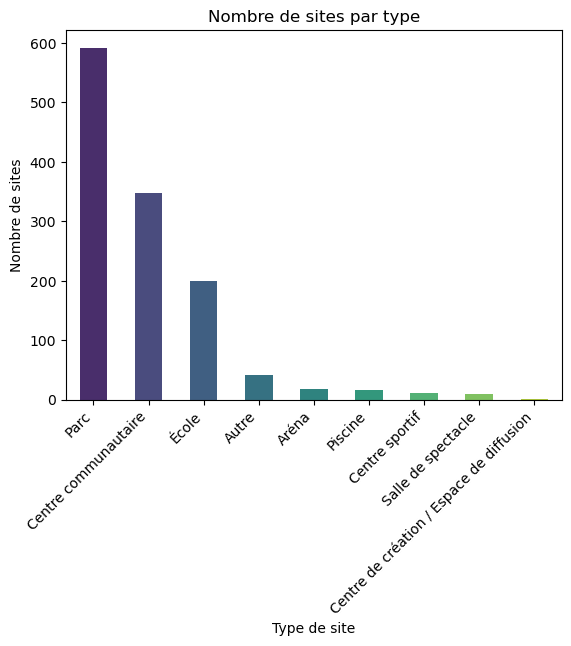

In [39]:
#Créer un histogramme
sns.barplot(x='descr_type_site', y='count', data=site_counts_df, palette='viridis', width = 0.5)

plt.xticks(rotation=45, ha='right')

plt.xlabel('Type de site')
plt.ylabel('Nombre de sites')
plt.title('Nombre de sites par type')